In [1]:
## ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
import time
import random
from qulacs import QuantumState
from qulacs.state import inner_product
from qulacs import QuantumCircuit
from qulacs.gate import to_matrix_gate
from qulacs import QuantumState
from qulacs.gate import Identity, X,Y,Z #パウリ演算子
from qulacs.gate import H
from qulacs.gate import RX,RY,RZ #パウリ演算子についての回転演算

## 理想的な回路作成


In [2]:
# 係数の絶対値の分布をプロットする関数
def show_distribution(state, nqubits):
    plt.bar([i for i in range(pow(2, nqubits))], abs(state.get_vector()))

### 動作の確認
5量子ビットのアルゴリズムを実装し、動作を確認する。

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]
adf:(1+0j)
初期：[0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j 0.1767767+0.j
 0.1767767+0.j 0.1767767+0.j]


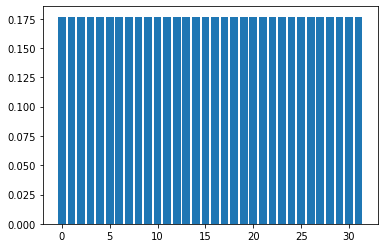

In [3]:
nqubits = 5
state = QuantumState(nqubits)
state.set_zero_state()
print(state.get_vector())
print(f'adf:{state.get_vector()[0]}')
# state.set_random_state()
# print(state.get_vector())

def make_Hadamard(nqubits):
    Hadamard = QuantumCircuit(nqubits)
    for i in range(nqubits):
        Hadamard.add_gate(H(i))
    return  Hadamard

Hadamard = make_Hadamard(nqubits)
Hadamard.update_quantum_state(state)

show_distribution(state, nqubits)
print(f'初期：{state.get_vector()}')



In [4]:
# オラクルU_wの作成
def make_U_w(nqubits):
    U_w = QuantumCircuit(nqubits)
    CnZ = to_matrix_gate(Z(nqubits-1))
    # i-th qubitが全て1の場合だけゲートを作用
    for i in range(nqubits-1):
        control_index = i
        control_with_value = 1
        CnZ.add_control_qubit(control_index, control_with_value)
    U_w.add_gate(CnZ)
    return U_w

In [5]:
# 反転U_sを作る
def make_U_s(nqubits):
    U_s = QuantumCircuit(nqubits)
    for i in range(nqubits):
        U_s.add_gate(H(i))

    ## 2|0><0| - I の実装
    U_s.add_gate(to_matrix_gate(RZ(nqubits-1, 2*np.pi))) ## まず、位相(-1)を全ての状態に付与する。ゲート行列はarrary([[-1,0],[0,-1]])
    U_s.add_gate( X(nqubits-1) )
    ## 全てのi-th qubitが0の場合だけZゲートを作用させる
    CnZ = to_matrix_gate(Z(nqubits-1))
    for i in range(nqubits-1):
        control_index = i
        control_with_value = 0
        CnZ.add_control_qubit(control_index, control_with_value)
    U_s.add_gate( CnZ )
    U_s.add_gate( X(nqubits-1) )

    for i in range(nqubits):
        U_s.add_gate(H(i))

    return U_s

In [6]:
hoge = state.copy()
U_w = make_U_w(nqubits)
U_w.update_quantum_state(hoge)
print(hoge.get_vector())

[ 0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j
  0.1767767+0.j  0.1767767+0.j  0.1767767+0.j -0.1767767+0.j]


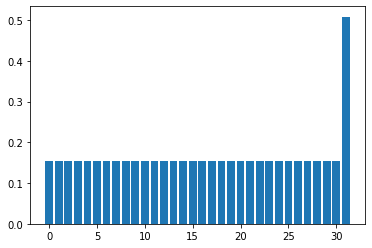

In [7]:
# 初期状態の準備
state = QuantumState(nqubits)
state.set_zero_state()
Hadamard.update_quantum_state(state)

# U_s, U_wを作用
U_s = make_U_s(nqubits)
U_w.update_quantum_state(state)
U_s.update_quantum_state(state)
show_distribution(state, nqubits)

In [8]:
nqubits = 5

# グローバーのアルゴリズム
def grover(nqubits, operate_time):
    state = QuantumState(nqubits)
    state.set_zero_state()

    # 内積を評価するために 解状態 |1...1> を作っておく
    target_state = QuantumState(nqubits)
    target_state.set_computational_basis(2 ** nqubits - 1) # 2**n_qubits-1 は 2進数で 1...1

    # グローバーのアルゴリズムの実行
    Hadamard = make_Hadamard(nqubits)
    U_w = make_U_w(nqubits)
    U_s = make_U_s(nqubits)

    result = []

    state = QuantumState(nqubits)
    state.set_zero_state()
    Hadamard.update_quantum_state(state)
    for k in range(operate_time):
        U_w.update_quantum_state(state)
        U_s.update_quantum_state(state)
        # show_distribution(state, nqubits)
        fuga = np.linalg.norm(inner_product(state, target_state))
        result.append(fuga)
        print(fuga)


    max_k = np.argmax(result)
    print(f'maximal probability {result[max_k]:5e} is obtained at k = {max_k + 1}')

    # plt.plot(np.arange(1, 30+1), result, "o-")
    plt.plot(result, "o-")

0.5082329989778305
0.7761601777867947
0.9470673343724091
0.9995910741614723
0.9271659296803515
0.738845043989187
0.4581685277993745
0.1202209456346408
0.23275425473442243
0.5566351732616823
maximal probability 9.995911e-01 is obtained at k = 4


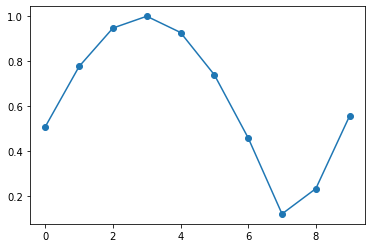

In [9]:
grover(5, 10)

## ランダムな初期状態の作成
次に、ランダムな初期状態を作成する。

In [10]:
from qulacs import DensityMatrix

# nqubits = 5
# state = QuantumState(nqubits)
# state
# mat = state.get_vector()
# hoge, fuga = np.split(mat, [int(mat.size * 0.7)])

# print(f'hogeL:{hoge}, fuga:{fuga}')

# hogeとfugaをQuantumStateに戻す

# ノイズを作用させる
# 配列を合わせて、シャッフルする
# QuantumStateの形に戻す
# →複素数からQuantumStateに戻すには、量子ビット数が必要

In [19]:
# 量子状態と複素数の積を利用して計算

nqubits = 5
p = 0.5
state1 = QuantumState(nqubits)
state2 = QuantumState(nqubits)
state1.set_zero_state()
state2.set_zero_state()
# psi_0, psi_Haar = state
psi_0 = state1
psi_Haar = state2

Hadamard = make_Hadamard(nqubits)
# Hadamard.update_quantum_state(psi_0)
psi_0.set_zero_state()

psi_Haar.set_Haar_random_state()

# print(f'psi_0s norm: {psi_0.get_squared_norm()}, psi_Haars norm:{psi_Haar.get_squared_norm()}')
# (√(1- p)|psi_0> と　(√(p)|psi_Haar>)を作成
coef = np.sqrt(1 - p)
psi_0.multiply_coef(coef)
print(f'psi_0:{psi_0.get_squared_norm()}')

coef = np.sqrt(p)
psi_Haar.multiply_coef(coef)
print(f'psi_Haar: {psi_Haar.get_squared_norm()}')

# (√(1- p)|psi_0> + √(p)|psi_Haar> を作成
state = psi_0
state.add_state(psi_Haar)
print(f'state:{state.get_vector()}')
print(f'ノルム：{state.get_squared_norm()}')
print(state.get_qubit_count())

psi_0:0.5000000000000001
psi_Haar: 0.5
state:[ 0.68076943+0.12681206j  0.08580921+0.07565319j  0.01769923+0.05237042j
 -0.03825345+0.26848372j -0.04421963-0.01831949j -0.04892035-0.02024108j
 -0.01372748-0.0616665j  -0.01617377+0.08656305j -0.10746227+0.05528653j
 -0.04880796+0.08982212j  0.0712328 +0.12779636j  0.08087771+0.08252445j
 -0.11577589-0.00517188j -0.04476528-0.03524165j  0.01544799+0.07710486j
  0.06953594-0.05474072j -0.00328331-0.06559423j -0.01673594-0.16588569j
 -0.14022084-0.1267546j  -0.12799367+0.04467223j  0.20150762-0.16936641j
 -0.04634851+0.10736766j -0.00788511+0.1001716j   0.02934325+0.10087957j
 -0.07144087+0.08042648j -0.00862882-0.09365747j -0.11693946-0.01951975j
 -0.09963333-0.08361721j -0.13274309-0.04148827j  0.08406246+0.08752737j
 -0.04200619-0.00238652j  0.05505777+0.07488898j]
ノルム：0.9627533603309977
5


In [13]:
from qulacs import QuantumState
from qulacs.state import permutate_qubit, drop_qubit

In [14]:
from matplotlib.pyplot import tight_layout
fig = plt.figure(figsize=(8, 5))
max_result = []
# グローバーのアルゴリズム
def noisy_grover(nqubits, operate_time):
    state = QuantumState(nqubits)
    state.set_zero_state()
    # 引数の値をシードとしてハール測度でランダムな純粋状態へ初期化
    # 指定値が無い場合はtime関数がシードとして使われる。疑似乱数はxorshiftを利用。
    # state.set_Haar_random_state(0)
    # print(f'state:{state}')

    # 内積を評価するために 解状態 |1...1> を作っておく
    target_state = QuantumState(nqubits)
    target_state.set_computational_basis(2 ** nqubits - 1) # 2**n_qubits-1 は 2進数で 1...1

    # グローバーのアルゴリズムの実行
    Hadamard = make_Hadamard(nqubits)
    U_w = make_U_w(nqubits)
    U_s = make_U_s(nqubits)

    result = []

    state = QuantumState(nqubits)
    state.set_zero_state()

    # state.set_Haar_random_state(seed)
    state.set_Haar_random_state()
    print(f'state:{state}')

    Hadamard.update_quantum_state(state)
    print(f'noisy_groverのノルム:{state.get_squared_norm()}')
    for k in range(operate_time):
        U_w.update_quantum_state(state)
        U_s.update_quantum_state(state)
        # show_distribution(state, nqubits)
        fuga = np.linalg.norm(inner_product(state, target_state))
        result.append(fuga)
        # print(fuga)


    max_k = np.argmax(result)
    max_result.append(result[max_k])
    print(f'maximal probability {result[max_k]:5e} is obtained at k = {max_k + 1}')

    # plt.plot(np.arange(1, 30+1), result, "o-")
    plt.plot(result, "o-")

<Figure size 576x360 with 0 Axes>

state: *** Quantum State ***
 * Qubit Count : 5
 * Dimension   : 32
 * State vector : 
 (-0.101988,-0.00343578)
   (0.0954246,-0.200185)
  (-0.0459928,0.0914211)
 (0.160382,-0.000994548)
    (0.102975,0.0480478)
   (0.0492993,-0.137757)
  (-0.0035748,0.0819785)
   (0.0883748,0.0148028)
   (-0.0469222,0.142549)
   (-0.0529118,0.173166)
    (0.124137,0.0978063)
   (-0.263968,0.0778248)
   (0.0731931,-0.176152)
     (0.173538,0.114238)
 (-0.0443288,-0.0887083)
 (-0.0176284,-0.0850635)
    (-0.179545,0.156292)
  (0.00095025,0.0796091)
   (-0.0459894,0.053738)
   (-0.431896,-0.119594)
    (-0.120648,0.171477)
   (0.0375954,0.0278297)
     (0.0874439,0.05129)
    (0.148388,-0.159729)
(-0.0436198,-0.00739032)
     (0.128271,0.182823)
  (-0.00461243,0.112248)
     (0.123101,0.155239)
   (0.242171,-0.0757606)
   (0.0364458,0.0686372)
   (-0.100935,-0.138317)
   (0.0960016,-0.129249)

noisy_groverのノルム:0.999999999999999
maximal probability 1.151362e-01 is obtained at k = 5


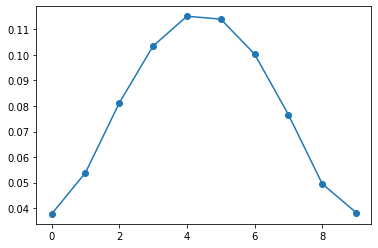

In [15]:
noisy_grover(5, 10)

In [16]:
hoge = state.copy()
U_w = make_U_w(nqubits)
U_w.update_quantum_state(hoge)
print(hoge.get_vector())

[ 0.70407224-0.00686289j -0.09112807+0.11482824j  0.04500789+0.08445662j
  0.08153834-0.04843622j -0.04052806-0.04660226j  0.00450686+0.10279725j
  0.00350747+0.02619076j -0.04125162-0.24710069j  0.01723625+0.0090459j
 -0.16433363-0.19637218j -0.03854772+0.11861535j -0.07969931-0.04675587j
  0.06017765-0.02418739j  0.07726749+0.02067678j -0.07687928+0.04141102j
 -0.08119143+0.110521j    0.07851988-0.06572087j -0.10260935-0.02681837j
 -0.00449131-0.02275228j  0.11830178-0.08853464j -0.08370179+0.07448272j
 -0.04051859+0.12474105j  0.09500368+0.07958003j  0.01443425+0.00757291j
  0.17936475-0.12300625j  0.05069477-0.03112242j  0.04833755+0.04140229j
 -0.06345959+0.12816949j -0.06243265-0.11528424j  0.023121  -0.14863048j
 -0.06765595+0.18416832j -0.04871111+0.09925417j]


### シード値の変更
シード値が0〜10まででどうのような動きをするのか調べる

state: *** Quantum State ***
 * Qubit Count : 5
 * Dimension   : 32
 * State vector : 
 (0.0522908,-0.0494196)
   (-0.163382,0.200215)
  (0.0575025,-0.189114)
(0.00850153,-0.0266837)
 (-0.0860515,-0.181481)
  (-0.100353,-0.240719)
   (-0.193732,0.100746)
   (0.100541,0.0522463)
 (-0.0685903,-0.124492)
  (0.0134343,0.0152707)
 (-0.0909537,-0.061048)
 (-0.110931,-0.0137252)
  (0.0395902,0.0808683)
  (-0.0777969,0.128004)
    (0.171258,0.100336)
  (-0.204557,0.0715469)
 (-0.142129,-0.0460161)
    (0.10148,-0.101597)
  (0.112869,-0.0755885)
 (-0.0635062,0.0744771)
   (0.0251223,0.193285)
 (-0.0559179,0.0316978)
  (0.182432,-0.0322059)
    (0.107856,0.271309)
    (0.124137,0.256664)
    (0.12138,-0.225273)
 (-0.0151677,-0.119987)
(-0.0782368,-0.0710391)
    (0.123981,0.221369)
 (-0.081377,-0.0105214)
  (-0.131086,0.0295634)
    (0.119553,-0.22051)

noisy_groverのノルム:0.999999999999999
maximal probability 1.743064e-01 is obtained at k = 7
state: *** Quantum State ***
 * Qubit Count : 5
 * Dime

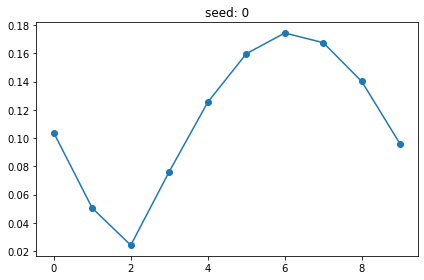

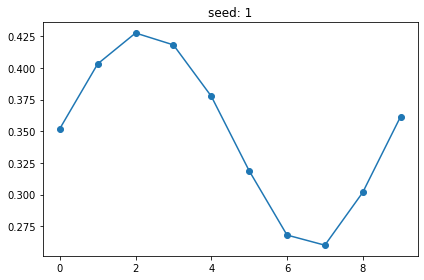

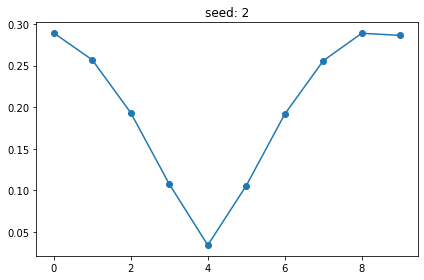

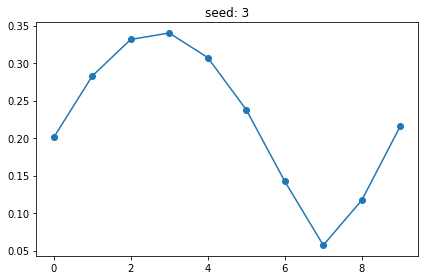

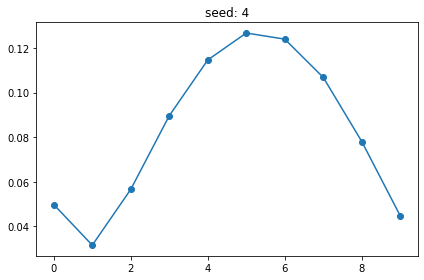

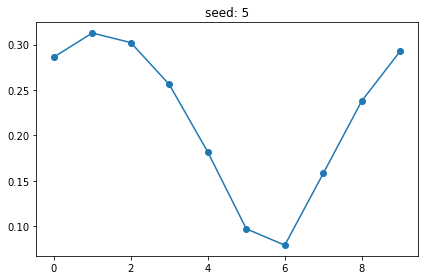

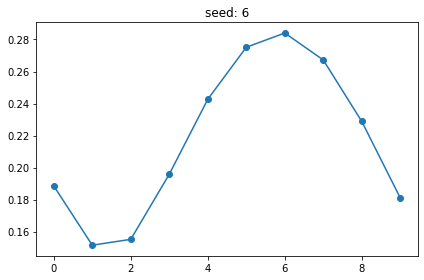

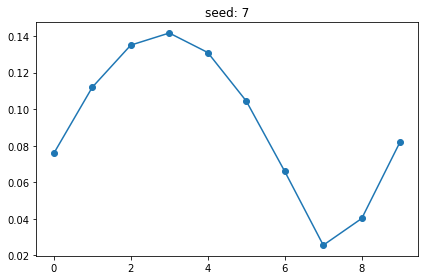

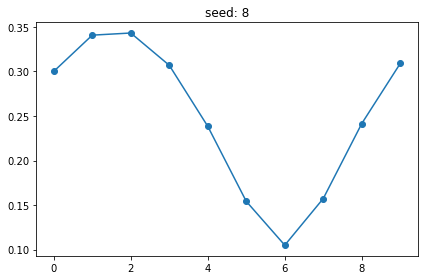

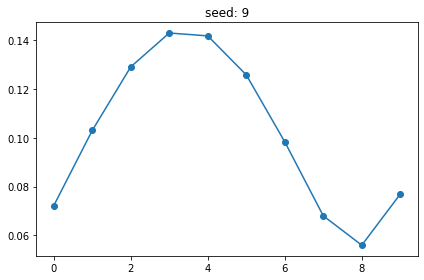

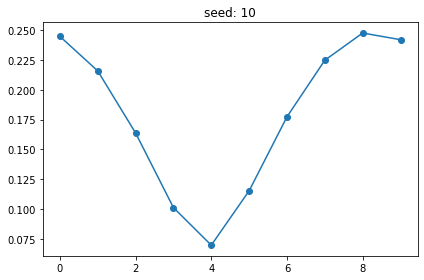

In [17]:
seed = 10
for i in range(seed + 1):
    plt.subplots(1, 1, tight_layout = True)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.title(f'seed: {i}')

    # noisy_grover(5, 10, i)
    noisy_grover(5, 10)

[0.11513617461271972, 0.17430636083088183, 0.4275025098102016, 0.2892732165416226, 0.34005481539212407, 0.1267494277367582, 0.3128735493870091, 0.28403861203070707, 0.1416913596443966, 0.34321477775741466, 0.14293526320659258, 0.24777908774163818]


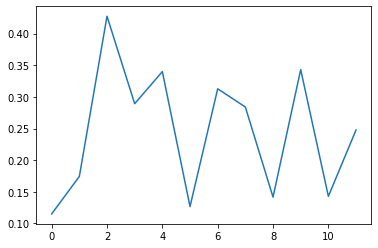

In [18]:
# max_resultのグラフを出力する
print(max_result)
plt.plot(max_result)